# 03. 분포

<br>

## 03.01. 분포
- **통계분포 : 가능한 결갓괐과 각 값에 대한 확률의 집합**
    - 예 : 주사위를 굴린경우 $\rightarrow$ 가능한 숫자의 집합은 1 ~ 6, 각 결갓값에 해당하는 확률은 1/6
    
- **경험적 (empirical)분포 : 이론적 분포에 대치되는 개념 (데이터에 기반한 개념)**

<br>

## 03.02. 확률질량함수
- 분포결과가 이산적인 경우, 분포를 확률질량함수로 표현 가능

In [2]:
from empiricaldist import Pmf

# Get utils.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/soln/utils.py')

from utils import set_pyplot_params
set_pyplot_params()

#### `empiricaldist.Pmf()`  : `Pmf()`객체 생성
- 어떤 결갓괎도 들어있지 않은 빈 `Pmf`객체 생성
- 대괄호를 사용하여 새로운 결괏값 지정 가능

In [3]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

,probs
heads,0.5
tails,0.5


<br>

#### `empiricaldist.Pmf.from_seq()` : 시퀀스에 대하여, 확률값을 나타내는 `Pmf`객체 생성

<br>

- 1 ~ 6의 결과가 1번씩 나타난 시퀀스의 Pmf

In [5]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


<br>

- 결괏값이 1 번이상 나타나는 경우
    - 11자로 이루어진 단어에서 'M'은 1번 등장 $\rightarrow$ 1/11
    - i는 4번 등장 $\rightarrow$ 4/11

In [6]:
letters = Pmf.from_seq(list('Mississippi'))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


- 'Missisipi'라는 단어 중 's'는 약 36%를 차지 

In [9]:
letters['s']

0.36363636363636365

- `Pmf`객체에 존재하지 않는 결과에 대한 확률은 KeyError 발생

In [10]:
try:
    letters['t']
except KeyError as e:
    print(type(e))

<class 'KeyError'>


In [13]:
letters('t')

0

- 확률의 시퀀스 

In [14]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

<br>

## 03.03. 다시 만난 쿠키 문제

> 쿠키 그릇 두 개가 있다고 가정
>
> * 첫 번째 그릇(그릇 1)에는 바닐라 쿠키 30개와 초콜릿 쿠키 10개가 들어있음
>
> * 두 번째 그릇(그릇 2)에는 바닐라 쿠키와 초콜릿 쿠키가 20개씩 들어있음
>
> 어떤 그릇인지 확인하지 않고, 임의로 그릇을 하나 골라서 거기에서 쿠키를 하나 집었다고 했을 떄, 그 때 그 쿠키가 바닐라 쿠키였다면, 이 바닐라 쿠키가 1번 그릇에서 나왔을 확률은?

<br>

- 두 가설과 사전확률을 나타내는 `Pmf`객체 생성

In [15]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

,probs
Bowl 1,0.5
Bowl 2,0.5


**각 가설에 대한 사전확률을 가지고 있는 사전확률분포(prior distribution)**
- 새로운 데이터에 대한 분포를 갱신하기 위해, 가능도에 사전확률을 곱함

In [16]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

,probs
Bowl 1,0.375
Bowl 2,0.250


#### **`normalize()`**
- 데이터에 대한 전체확률

In [19]:
posterior.normalize()

1.0

- **posterior는 각 가설의 사후확률을 가지고 있는 사후확률분포**

In [20]:
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


In [21]:
posterior('Bowl 1')

0.6

<br>

- **꺼냈던 쿠키를 다시 넣고, 같은 그릇에서 쿠키를 꺼냈을 때, 이 쿠키가 바닐라라면, 다음과 같이 갱신**

In [22]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


<br>

- **다시 한번 쿠키를 다시 넣고, 같은 그릇에서 쿠키를 꺼냈을 때, 이 쿠키가 초콜릿**

In [23]:
likelihood_chocolate = [0.25, 0.5]

In [24]:
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


<br>

#### 두 개의 바닐라 쿠키와 한 개의 초콜릿 쿠키를 꺼낸 후, 사후확률은 50/50에 가까워짐

<br>

## 03.04. 101개의 쿠키 그릇

101 개의 쿠키그릇 문제
> 그릇 0에는 바닐라 쿠키가 0%가 있음
> 
> 그릇 1에는 바닐라 쿠키가 1%가 있음
>
> $\dots$
>
> 그릇 100에는 바닐라 쿠키만 (100%)가 있음

**임의의 그릇을 골라, 쿠키글 임의로 꺼냈는데, 이 쿠키가 바닐라 쿠키였을 때**

**각 값 $x$에 대해, 그릇 $x$에서 쿠키가 나왔을 확률은?**

<br>

- 사전확률분포 생성
    - 모든 그릇에 대한 사전확률은 균등 (Uniform)

In [41]:
import numpy as np
from fractions import Fraction

In [42]:
hypos = np.arange(101) 
prior = Pmf(Fraction(1, 101), hypos)
prior.head()

,probs
0,1/101
1,1/101
2,1/101


<br>

- 데이터의 가능도
    - 각 그릇에 있는 바닐라 쿠키의 비율

In [43]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

<br>

- 사후확률분포 계산

In [44]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


<br>

- 바닐라 쿠키를 하나 뽑은 후의 사전확률분포와 사후확률분포
    - 그릇 0에는 바닐라 쿠키가 하나도 없으므로 사후확률은 0
    - 그릇 100번에 바닐라 쿠키가 가장 많이 들어 있으므로, 이 그릇의 사후확률이 가장 높을 것
    - 이 두 사후확률값의 사이에서 사후확률의 가능도는 그릇의 번호에 비례 $\rightarrow$ 사후확률분포는 선형으로 나타냄

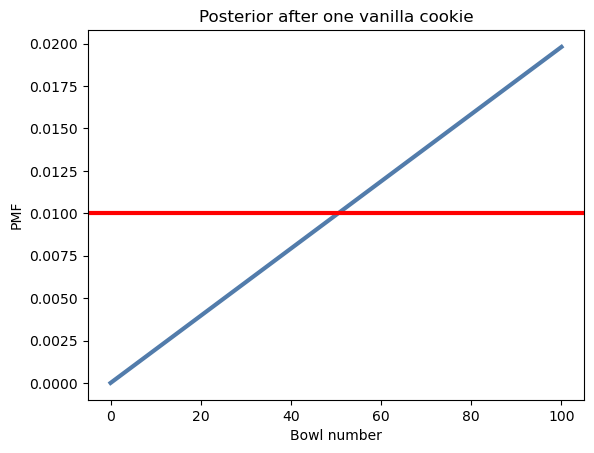

In [55]:
import matplotlib.pyplot as plt

posterior1.plot()
plt.title('Posterior after one vanilla cookie')
plt.axhline(0.01, color = 'red')
plt.xlabel('Bowl number')
plt.ylabel('PMF')
plt.show()

<br>

**고른 쿠키를 다시 돌려놓고, 동일한 그릇에서 한 번 더 뽑았을 때, 다시 한번 바닐라 쿠키가 나옴**
- 바닐라 쿠키를 확인한 후, 가장 큰 번호의 그릇에 바닐라 쿠키가 가장 많으므로, 사후확률이 크고

    가장 작은 번호의 그릇의 사후확률이 가장 작음

In [56]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

0.6699999999999997

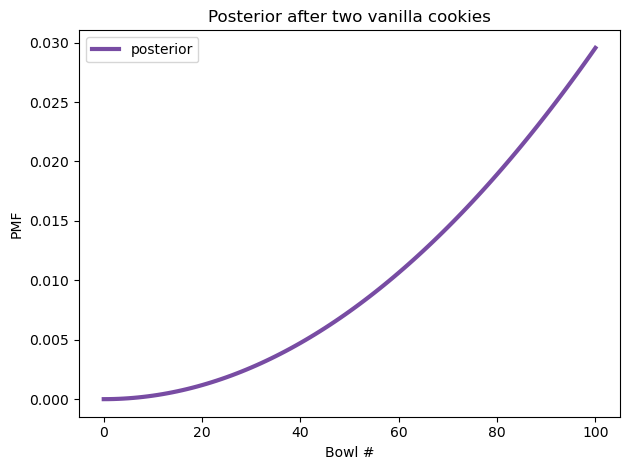

In [57]:
posterior2.plot(label='posterior', color='C4')
decorate_bowls('Posterior after two vanilla cookies')

<br>

**쿠키를 다시 돌려놓고, 다시 한번 쿠키를 골랐을 때, 초콜릿 쿠키가 나옴**
- 100번 그릇의 확률 값은 사라짐 $\rightarrow$ 100번 그릇에는 초콜릿 쿠키의 개수가 0 이기 대문
- 67번 그릇의 사후확률분포가 가장 높으며, 이 그릇의 바닐라 쿠키 비율은 1/3

In [63]:
likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

0.24626865671641784

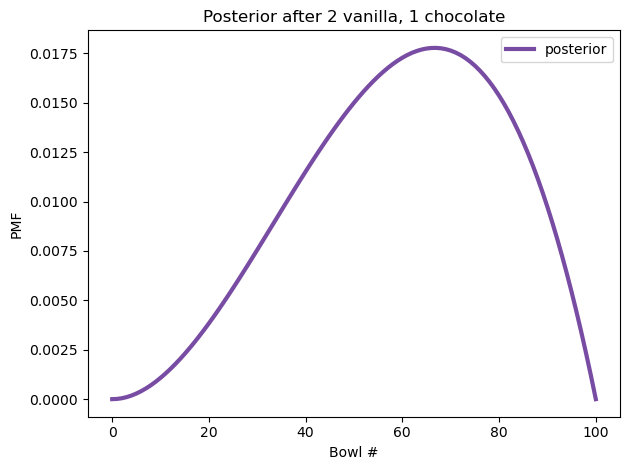

In [64]:
posterior3.plot(label='posterior', color='C4')
decorate_bowls('Posterior after 2 vanilla, 1 chocolate')

<br>

#### MAP (최대 사후확률, maximum posterior probability) : 사후확률분포에서 가장 큰 확률값

In [65]:
posterior3.idxmax()
# posterior3.max_prob()
# np.argmax(posterior3)

67

## 03.05. 주사위 문제


> 육면체, 팔면체, 십이면체 주사위가 든 상자가 존재, 
>
> 이 중 주사위 하나를 임의로 집어서 굴렸더니 1이 나왔다
> 
> 이 경우 육면체 주사위를 골랐을 확률은?


<br>

- 사후확률분포

In [74]:
hypos = [6, 8, 12]

In [76]:
prior = Pmf(Fraction(1, 3), hypos)
prior

,probs
6,1/3
8,1/3
12,1/3


<br>

**`qs` : `Pmf`객체의 분포에 포함되는 원소**

**`ps` : `Pmf`객체의 확률에 포함되는 원소**

In [77]:
prior.qs

array([ 6,  8, 12], dtype=int64)

In [78]:
prior.ps

array([Fraction(1, 3), Fraction(1, 3), Fraction(1, 3)], dtype=object)

<br>

- 가능도 갱신 (= 각 주사위별로 1이 나올 확률)

In [79]:
likelihood1 = 1/6, 1/8, 1/12

In [80]:
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


- 육면체 주사위의 사후확률은 4/9

<br>

#### 동일한 주사위를 굴려서 7이 나왔을 때의 가능도

In [81]:
likelihood2 = 0, 1/8, 1/12

In [82]:
posterior *= likelihood2
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


#### 주사위를 굴려 1과 7이 나온 후, 팔면체 주사위의 사후확률은 약 69%

<br>

## 03.06. 주사위 갱신


In [84]:
def update_dice(pmf, data):
    """새로운 데이터를 기반으로 pmf를 갱신"""
    
    hypos = pmf.qs 
    likelihood = 1 / hypos
    
    impossible = (data > hypos)
    likelihood[impossible] = 0
    
    pmf *= likelihood
    pmf.normalize()

In [85]:
pmf = prior.copy()
pmf

,probs
6,1/3
8,1/3
12,1/3


In [86]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692
